In [48]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## 1. Importing the Dataset

In [49]:
data = pd.read_excel("Train.xlsx")
data_test = pd.read_excel("Test.xlsx")

# 2. Display Top 5 Rows of The Dataset

In [50]:
data.head()

,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,"angle(Y,gravityMean)",Activity
0,0.963396,-0.140840,0.892055,-0.161265,0.977436,-0.123213,-0.975510,-1.0,-1.0,0.179941,STANDING
1,0.966561,-0.141551,0.892060,-0.161343,0.984520,-0.114893,-0.978500,-1.0,-1.0,0.180289,STANDING
2,0.966878,-0.142010,0.892401,-0.163711,0.986770,-0.114893,-0.981672,-1.0,-1.0,0.180637,STANDING
3,0.967615,-0.143976,0.893817,-0.163711,0.986821,-0.121336,-0.982420,-1.0,-1.0,0.181935,STANDING
4,0.968224,-0.148750,0.893817,-0.166786,0.987434,-0.121834,-0.984363,-1.0,-1.0,0.185151,STANDING


# 3. Check Last 5 Rows of The Dataset

In [51]:
data.tail()

,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,"angle(Y,gravityMean)",Activity
7347,0.923148,-0.222004,0.867718,-0.214233,0.920554,-0.234998,-0.995193,-0.097745,-1.0,0.238604,WALKING_UPSTAIRS
7348,0.918343,-0.242054,0.866116,-0.231477,0.920554,-0.234998,-0.995151,-0.144103,-1.0,0.252676,WALKING_UPSTAIRS
7349,0.919810,-0.236950,0.854641,-0.249134,0.933008,-0.216004,-0.995450,-0.420072,-1.0,0.249145,WALKING_UPSTAIRS
7350,0.922323,-0.233230,0.855988,-0.244267,0.933008,-0.210542,-0.998824,-0.402564,-1.0,0.246432,WALKING_UPSTAIRS
7351,0.918707,-0.233292,0.855988,-0.240956,0.916729,-0.212149,-0.998144,-0.232980,-1.0,0.246809,WALKING_UPSTAIRS


# 4. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [52]:
data.shape

(7352, 11)

In [53]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of Rows 7352
Number of columns 11


# 5. Taking Care of Duplicate Values

In [54]:
data.duplicated().any()

False

In [55]:
duplicated_columns = data.columns[data.T.duplicated()].tolist()

In [56]:
len(duplicated_columns)

0

# 6.Taking Care of Missing Values

In [57]:
 data.isnull().sum()

tGravityAcc-mean()-X       0
tGravityAcc-mean()-Y       0
tGravityAcc-max()-X        0
tGravityAcc-max()-Y        0
tGravityAcc-min()-X        0
tGravityAcc-min()-Y        0
tGravityAcc-energy()-Z     0
tGravityAcc-entropy()-X    0
tGravityAcc-entropy()-Y    0
angle(Y,gravityMean)       0
Activity                   0
dtype: int64

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

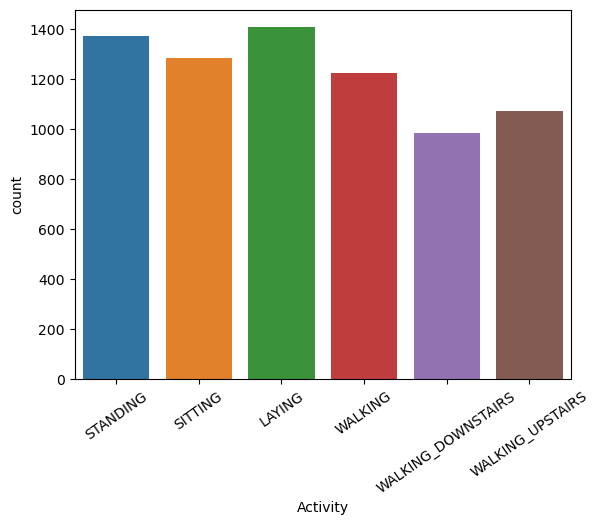

In [59]:
sns.countplot(data['Activity'])
plt.xticks(rotation=35)
plt.show()

## 7. Store Feature Matrix In X and Response(Target) In Vector y

<AxesSubplot:>

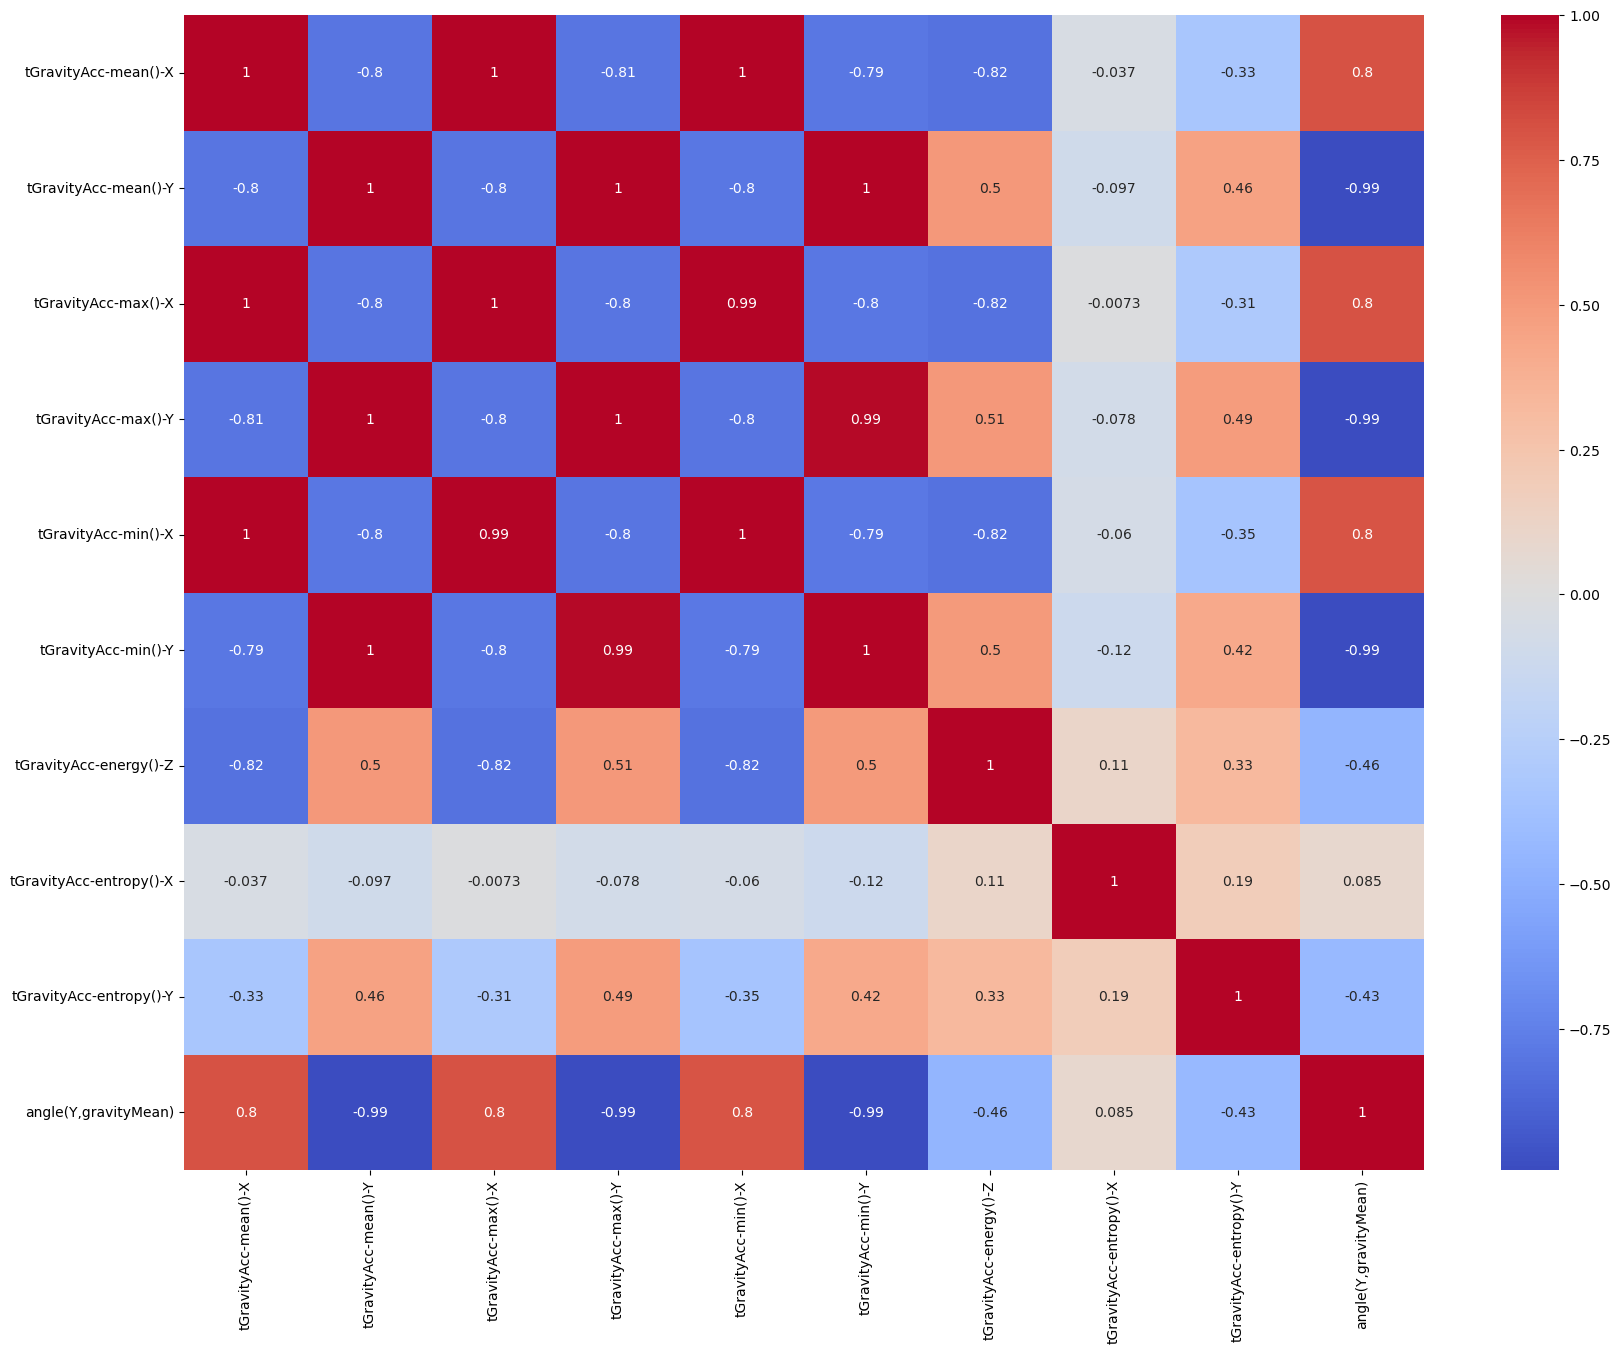

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [61]:
X = data.drop('Activity',axis=1)
y= data['Activity']

In [62]:
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [64]:
y

array([2, 2, 2, ..., 5, 5, 5])

## 8. Splitting The Dataset Into The Training Set And Test Set

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)

## 9. Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
log  = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.6770904146838885

# 10. Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
y_pred2 = rf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8919102651257648

In [72]:
import joblib

In [73]:
joblib.dump(rf,"model_rfe")

['model_rfe']

In [74]:
data_test=data_test.drop("Activity",axis=1)

In [75]:
duplicated_columns = data_test.columns[data_test.T.duplicated()].to_list()


In [76]:
data_test = data_test.drop(duplicated_columns,axis=1)

In [77]:
model = joblib.load('model_rfe')

In [78]:
model.predict(X_test)

array([4, 4, 3, ..., 1, 1, 1])

# 10. GUI

In [79]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox

def open_file():
    filepath = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx")])
    if filepath:
        try:
            data = pd.read_excel(filepath)
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error", f"Failed to open file: {e}")

def process_data(data):
    duplicated_columns = data.columns[data.T.duplicated()].tolist()
    data_test = data.drop(duplicated_columns, axis=1)

    model = joblib.load("model_rfe")  # Make sure you have the correct path to your model file.  # Adjust this according to your data columns.
    y_pred = model.predict(X_test)
    # standing: 0, sitting: 1, laying: 2, WALKING_DOWNSTAIRS: 3,
    # walking_upstairs: 4, walking: 5
    y_pred = pd.Series(y_pred)
    y_pred = y_pred.map({0: 'Standing', 1: 'Sitting', 2: 'Laying',
                         3: 'Walking_downstairs', 4: 'Walking_upstairs',
                         5: 'Walking'})
    data['Predicted_target'] = y_pred
    save_file(data)

def save_file(data):
    savepath = filedialog.asksaveasfilename(defaultextension=".xlsx",
                                            filetypes=[("Excel Files", "*.xlsx")])
    if savepath:
        try:
            data.to_excel(savepath, index=False)  # Corrected method to_excel
            messagebox.showinfo("Success", "File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to save file: {e}")


# Create a Tkinter GUI

root = tk.Tk()

root.title("Classification")

root.geometry("200x200")

button1 = tk.Button(root, text="Open Excel File",
                    width=15,
                    height=2,
                    background="lightgreen",
                    activebackground="lightblue",
                    font=("Arial", 11, "bold"),
                    command=open_file)

button1.pack(pady=50)

root.mainloop()
